<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/Zalocusky_Data_Scanpy_RevFilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 7.7 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=64d970d5da8ca1d7eb25e5a5fa89cf4d37cc3236180fc9e5dfa6d12b5c618660
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=616dcc13d087f3925f

In [ ]:
import h5py
import numpy as np
import scipy as sci
from matplotlib import pyplot as plt
import scanpy as sc
import tarfile
import os
import anndata as ad
import pandas as pd

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [ ]:
def get_file(link):
    file_name = os.path.basename(link)
    !wget -O $file_name $link
    return file_name

--2023-06-12 23:23:08--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_raw_gene_bc_matrices_h5.h5
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 165.112.9.228, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25353333 (24M)
Saving to: ‘GSE167497_raw_gene_bc_matrices_h5.h5’

GSE167497_raw_gene_ 100%[===================>]  24.18M  25.2MB/s    in 1.0s    

2023-06-12 23:23:09 (25.2 MB/s) - ‘GSE167497_raw_gene_bc_matrices_h5.h5’ saved [25353333/25353333]



/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [ ]:


# barcode_file_name = get_file('https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_barcode_summary_h5.h5')
filtered_file_name = get_file('https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_filtered_gene_bc_matrices_h5.h5')
raw_gene_file_name = get_file('https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_raw_gene_bc_matrices_h5.h5')


--2023-06-12 23:23:13--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_filtered_gene_bc_matrices_h5.h5
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 165.112.9.228, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12286523 (12M)
Saving to: ‘GSE167497_filtered_gene_bc_matrices_h5.h5’

GSE167497_filtered_ 100%[===================>]  11.72M  16.9MB/s    in 0.7s    

2023-06-12 23:23:14 (16.9 MB/s) - ‘GSE167497_filtered_gene_bc_matrices_h5.h5’ saved [12286523/12286523]

--2023-06-12 23:23:14--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_raw_gene_bc_matrices_h5.h5
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 165.112.9.228, 2607:f220:41f:250::229, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP request se

In [ ]:
adata_filtered = sc.read_10x_h5(filtered_file_name)
adata_filtered.var_names_make_unique()
adata_raw = sc.read_10x_h5(raw_gene_file_name)
adata_raw.var_names_make_unique()


reading GSE167497_filtered_gene_bc_matrices_h5.h5
 (0:00:00)
reading GSE167497_raw_gene_bc_matrices_h5.h5


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:01)


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


genes_per_cell:  476 passed.  475 did not pass
cells_per_gene:  4969 passed.  4976 did not pass


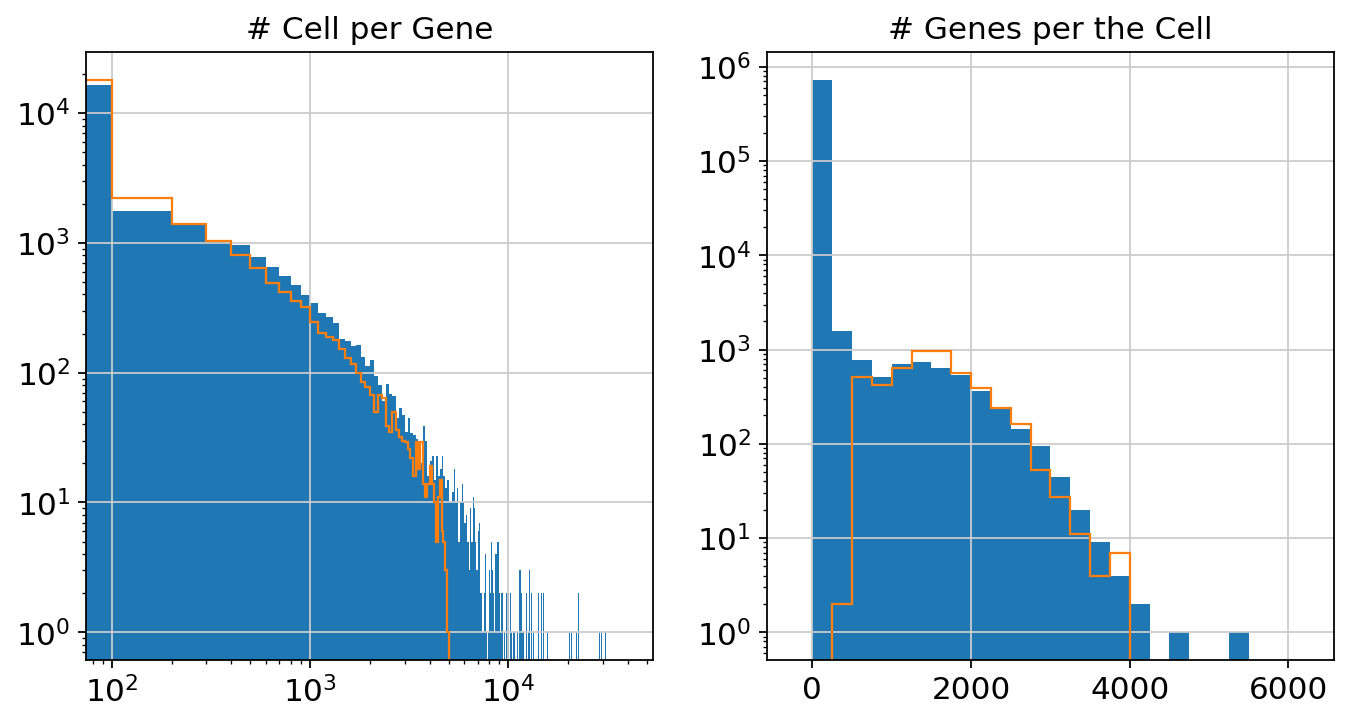

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.flatten()



x_raw = adata_raw.X.copy()
x_raw_logic = x_raw>0
x_raw_cells_per_gene = x_raw_logic.T.sum(axis= 1)
x_raw_genes_per_cell = x_raw_logic.sum(axis= 1)

x_filt = adata_filtered.X.copy()
x_filt_logic = x_filt>0
x_filt_cells_per_gene = x_filt_logic.T.sum(axis= 1)
x_filt_genes_per_cell = x_filt_logic.sum(axis= 1)

n=100
bins = list(np.arange(-1*n,40000,n))
count_bin_r = ax[0].hist(x_raw_cells_per_gene,bins=bins)
count_bin_f = ax[0].hist(x_filt_cells_per_gene,count_bin_r[1],histtype='step')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_title('# Cell per Gene')

n=250
bins = np.arange(-1*n,6500,n)
count_bin_r = ax[1].hist(x_raw_genes_per_cell,bins=bins)
count_bin_f = ax[1].hist(x_filt_genes_per_cell,count_bin_r[1],histtype='step')
ax[1].set_yscale('log')
ax[1].set_title('# Genes per the Cell')




min_filt_pass= np.min(x_filt_genes_per_cell)
max_filt_out = np.max(x_raw_genes_per_cell[x_raw_genes_per_cell<min_filt_pass])
print('genes_per_cell: ',min_filt_pass,'passed. ',max_filt_out,'did not pass')
# print()
max_filt_pass= np.max(x_filt_cells_per_gene)
min_filt_fail = np.min(x_raw_cells_per_gene[x_raw_cells_per_gene>max_filt_pass])
print('cells_per_gene: ',max_filt_pass,'passed. ',min_filt_fail,'did not pass')

In [ ]:



adata_M = sc.read_10x_h5(raw_gene_file_name)
sc.pp.filter_cells(adata_M, min_genes=475)
sc.pp.filter_cells(adata_M, max_genes=4000 )
display(adata_M)
sc.pp.filter_genes(adata, min_cells=1)
sc.pp.filter_genes(adata, max_cells=5000)
display(adata)
# adata.var['mt'] = adata.var_names.str.startswith('mt-')
# sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
# adata = adata[adata.obs.pct_counts_mt < 0.25, :]
# display(adata)

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.22.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.10
reading GSE167497_raw_gene_bc_matrices_h5.h5
 (0:00:01)
filtered out 732305 cells that have less than 475 genes expressed


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


filtered out 4 cells that have more than 4000 genes expressed


/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4971 × 27998
    obs: 'n_genes'
    var: 'gene_ids'

AnnData object with n_obs × n_vars = 4971 × 19871
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'